# **Home-Residential Stays for Business Travelers: A Case Study**

**Scenario**: You work for a European boutique hotel / home accommodation company that wants to expand to New York City, your first North American operation. Your company wants to establish a network of home residences for business travelers who need to be in New York for extended periods for work.

**Objective**: Your goal is to analyze the available NYC open data of accommodation and present insights into the NYC home accommodation market to help your client make business decisions.

**Metrics**: 
Ratio of property price to expected revenue generate from property


*   Rent from property(Price of listing)
*   Sale price of property

















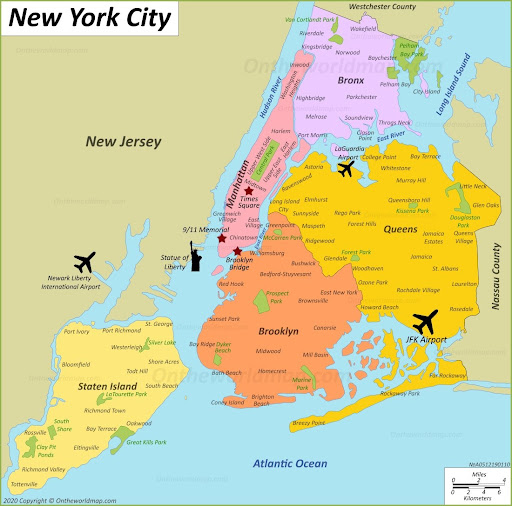

## Project steps:
* Data loading
* Data cleaning
* Exploratory data analysis (EDA)
* Conclusion





# Data Sourcing

Import necessary packages

In [1]:
#instaling haversine package which would help to calculate distance between two location having latitude and longitude
!pip install haversine


In [2]:
#Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.image as mpimg
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')
from haversine import haversine_vector, Unit

In [3]:
#read file using Pandas library
df_nyc = pd.read_csv('https://raw.githubusercontent.com/som-choudhary/Airbnb/main/Airbnb_new.csv')

df_nyc.head()

,Unnamed: 0,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,10/19/18,0.21,6.0,365.0
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,NaN,5/21/19,0.38,2.0,NaN
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,NaN,harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,clinton hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,07-05-2019,4.64,1.0,194.0
4,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,murray hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,6/22/19,0.59,1.0,129.0


**Check length and description of data frame**

In [4]:
#length of dataframe
len(df_nyc)

42638

In [5]:
#datatype of each column
df_nyc.dtypes

Unnamed: 0                          int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
borough                            object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

In [6]:
#statistics summary of the dataframe
df_nyc.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,42638.000000,4.263800e+04,4.263800e+04,42607.000000,42609.000000,42602.000000,42604.000000,42613.000000,33902.000000,42622.000000,42596.000000
mean,24323.437544,1.892386e+07,6.633856e+07,40.725488,-73.949830,148.516173,6.974298,23.045080,1.346574,6.840036,111.562447
std,14062.225405,1.094655e+07,7.755554e+07,0.054140,0.046089,235.828980,20.295628,44.411525,1.636901,32.246048,131.392817
min,0.000000,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,12117.250000,9.410163e+06,7.650650e+06,40.688225,-73.979220,65.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,24300.500000,1.956904e+07,3.028359e+07,40.718130,-73.954370,100.000000,3.000000,5.000000,0.690000,1.000000,42.000000
75%,36444.500000,2.897789e+07,1.056342e+08,40.756690,-73.933800,174.000000,5.000000,23.000000,2.000000,2.000000,224.000000
max,48892.000000,3.648543e+07,2.743115e+08,40.904840,-73.712990,10000.000000,1250.000000,629.000000,20.940000,327.000000,365.000000


In [7]:
#median value of each column
print('Median Values')
print('\n')
print(df_nyc[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']].median())

Median Values


price                             100.00
minimum_nights                      3.00
number_of_reviews                   5.00
reviews_per_month                   0.69
calculated_host_listings_count      1.00
availability_365                   42.00
dtype: float64


# Data Cleaning

Let's analyze each column and will do the necessary data cleaning if required

## Missing value handling

In [8]:
#missing values in each column
df_nyc.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                14
host_id                              0
host_name                           56
borough                             67
neighbourhood                        0
latitude                            31
longitude                           29
room_type                           86
price                               36
minimum_nights                      34
number_of_reviews                   25
last_review                       8746
reviews_per_month                 8736
calculated_host_listings_count      16
availability_365                    42
dtype: int64

In [9]:
#percent of missing values
df_nyc.isnull().sum()/len(df_nyc)*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.032835
host_id                            0.000000
host_name                          0.131338
borough                            0.157137
neighbourhood                      0.000000
latitude                           0.072705
longitude                          0.068014
room_type                          0.201698
price                              0.084432
minimum_nights                     0.079741
number_of_reviews                  0.058633
last_review                       20.512219
reviews_per_month                 20.488766
calculated_host_listings_count     0.037525
availability_365                   0.098504
dtype: float64

Here we can observe 'last_reviews' and 'reviews_per_month' contain more 20% missing values. Since 'last_reviews' is not significant for our anlysis we can drop that column. Also, to make our data set cleaner we can remove 'id' and 'host name' for our analysis.


In [10]:
#droping 'id' 'host_name'and last review' columns
df_nyc.drop(['id','host_name','last_review'], axis =1, inplace = True )

In [11]:
#check cloumn name
df_nyc.columns

Index(['Unnamed: 0', 'name', 'host_id', 'borough', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

The missing values of 'review_per_month' can be easily handled by replacing NaN with 0, instead of delating 20% of data. Since many rows in 'number_of_reviews' have zero reviews, it makes sense to replace with 0 as well. 


In [12]:
#replacing Null value 'review_per_month' with 0
df_nyc.fillna({'reviews_per_month':0}, inplace=True)

Since other columns had far fewer missing values, we can simply remove those rows for our analysis.

In [13]:
#dropping rows having missing values
df_nyc.dropna(inplace = True)
df_nyc.isnull().sum()

Unnamed: 0                        0
name                              0
host_id                           0
borough                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Standardizing categorical columns

As you can see, three categorical variables are present.
* borough
* neighbourhood
* room_type





In [14]:
#check unique values of borough
pd.unique(df_nyc['borough'])

array(['Brooklyn', 'Manhattan', 'Queens', 'Brookly', 'Staten Island',
       'Bronx', 'Queen', 'Manhattn', 'Manhatteen', 'Mahattan'],
      dtype=object)

In [15]:
#correct misspellings of borough
df_nyc = df_nyc.replace('Brookly', 'Brooklyn').replace(['Manhattn', 'Manhatteen', 'Mahattan'], 
                                                   'Manhattan').replace('Queen', 'Queens')

In [16]:
#confirm changes
pd.unique(df_nyc['borough'])

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [17]:
#check neighbourhood
pd.unique(df_nyc['neighbourhood'])

array(['kensington', 'clinton hill', 'murray hill', 'upper west side',
       'south slope', 'chelsea', 'crown heights', 'park slope',
       'windsor terrace', 'inwood', 'east village', 'harlem',
       'bedford-stuyvesant', 'bushwick', 'flatbush', 'fort greene',
       'greenpoint', 'kips bay', 'williamsburg', 'soho',
       'upper east side', 'washington heights', 'woodside',
       'brooklyn heights', 'prospect heights', 'carroll gardens',
       'lower east side', 'flatlands', 'cobble hill', 'flushing',
       'boerum hill', 'sunnyside', 'gowanus', 'st. george', 'highbridge',
       'financial district', 'ridgewood', 'jamaica', 'middle village',
       'roosevelt island', 'chinatown', 'midtown', 'little italy',
       'east flatbush', 'tompkinsville', 'astoria', 'kingsbridge',
       'queens village', 'forest hills', 'greenwich village', 'woodlawn',
       'morningside heights', 'gravesend', 'gramercy', 'east new york',
       'concourse village', 'sheepshead bay', 'emerson hill',

In [18]:
#number of neighbourhoods
len(pd.unique(df_nyc['neighbourhood']))

170

In [19]:
#check unique values of room type
pd.unique(df_nyc['room_type'])

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Three types of rooms are available :

*   Private room
*   Entire home/apartment
*   Shared room










## Outlier Detection

Since price is the key metric that we are interested in. and different neighbourhoods have different affordability, we will remove outliers based on the price for each neighbourhood.

In [20]:
#checking the descriition of price column
df_nyc['price'].describe()

count    42346.000000
mean       148.617390
std        236.390978
min          0.000000
25%         65.000000
50%        100.000000
75%        174.000000
max      10000.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Top 10 neighbour Unclean')

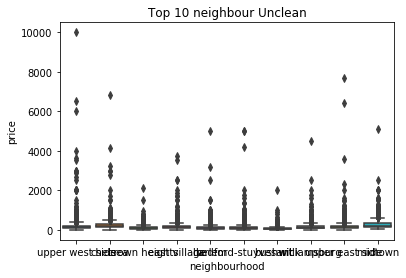

In [21]:
#cleaner version of above box plot with top 10 neighbour

top_neighbour = df_nyc.neighbourhood.value_counts().head(10).index

#df_neighbour = df_nyc[df_nyc['neighbourhood'].isin(top_neighbour)]

df_neighbour_price = df_nyc[df_nyc['neighbourhood'].isin(top_neighbour)][['price','neighbourhood']]

sns.boxplot( data=df_neighbour_price, x='neighbourhood', y='price').set_title('Top 10 neighbour Unclean')

In [22]:
#define function which return index of outlier row using IQR method

def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_drop=df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_drop

In [23]:
#creating list of unique neghbourhood
neighbourhood = df_nyc['neighbourhood'].unique()

In [24]:
#Creating empty list where we will add index of outlier row
outlier_index = []

In [25]:
#getting outlier index for each neighbourhood
for i in range(len(neighbourhood)):
  #passing price column for ith neighbour to 'Outlier_IQR' to get index of outlier for ith neighbour
  df_outlier=remove_outlier_IQR(df_nyc[df_nyc['neighbourhood']== neighbourhood[i]].price)
  #adding outlier index into 'outlier_index' list
  outlier_index.extend(df_outlier.index)


In [26]:
#no. of outliers
len(outlier_index)

2728

In [27]:
#drop outliers
df_nyc_clean = df_nyc.drop(outlier_index)

In [28]:
#length of clean dataframe
len(df_nyc_clean)

39618

In [29]:
#comparing statistical description of price column for df_nyc_clean and df_nyc
print('df_nyc_clean \n')
print(df_nyc_clean['price'].describe())
print('\n')
print('df_nyc \n')
print(df_nyc['price'].describe())

df_nyc_clean 

count    39618.000000
mean       119.506487
std         75.976393
min          0.000000
25%         65.000000
50%        100.000000
75%        150.000000
max        850.000000
Name: price, dtype: float64


df_nyc 

count    42346.000000
mean       148.617390
std        236.390978
min          0.000000
25%         65.000000
50%        100.000000
75%        174.000000
max      10000.000000
Name: price, dtype: float64


std decresed in df_nyc_clean

Text(0.5, 1.0, 'cleaned without outliers')

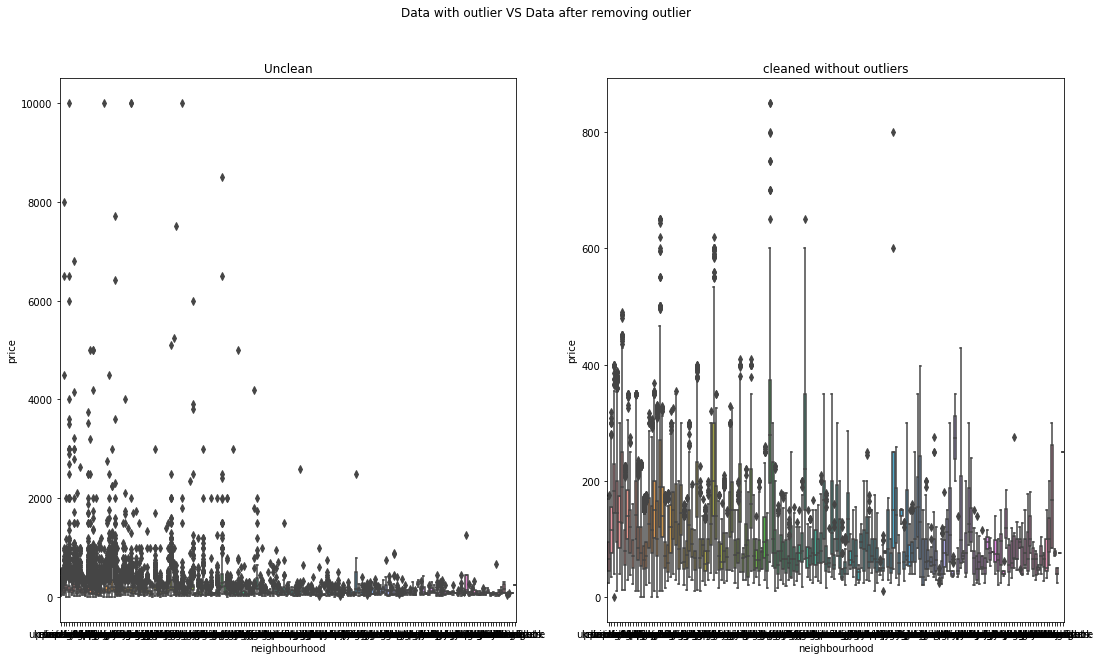

In [30]:
#Ploting box plot 
# x-aix = neighbourhood (221)
# Y axis = price

df_neighbour_price_clean = df_nyc_clean[['price','neighbourhood']]
df_neighbour_price = df_nyc[['price','neighbourhood']]

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

fig.suptitle('Data with outlier VS Data after removing outlier')

sns.boxplot(ax=axes[0], data=df_neighbour_price, x='neighbourhood', y='price').set_title('Unclean')
sns.boxplot(ax=axes[1], data=df_neighbour_price_clean, x='neighbourhood', y='price').set_title('cleaned without outliers')

Text(0.5, 1.0, 'Top 10 neighbour clean')

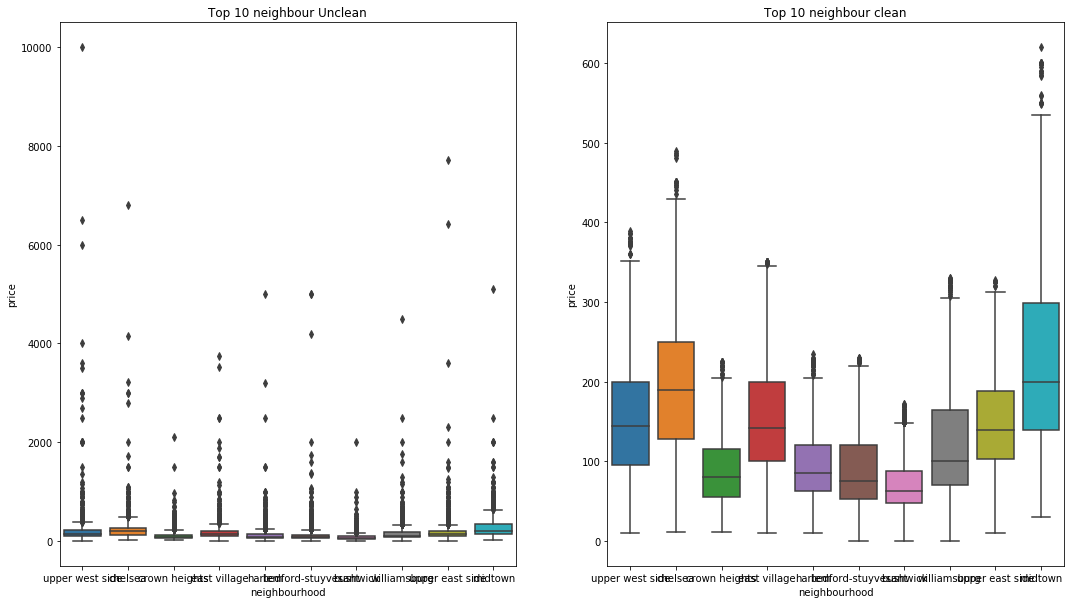

In [31]:
#cleaner version of above box plot with top 10 neighbour

top_neighbour = df_nyc.neighbourhood.value_counts().head(10).index

#df_neighbour = df_nyc[df_nyc['neighbourhood'].isin(top_neighbour)]

df_neighbour_price_clean = df_nyc_clean[df_nyc_clean['neighbourhood'].isin(top_neighbour)][['price','neighbourhood']]
df_neighbour_price = df_nyc[df_nyc['neighbourhood'].isin(top_neighbour)][['price','neighbourhood']]

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

sns.boxplot(ax=axes[0], data=df_neighbour_price, x='neighbourhood', y='price').set_title('Top 10 neighbour Unclean')
sns.boxplot(ax=axes[1], data=df_neighbour_price_clean, x='neighbourhood', y='price').set_title('Top 10 neighbour clean')


#### Optional plot to visualize price column 

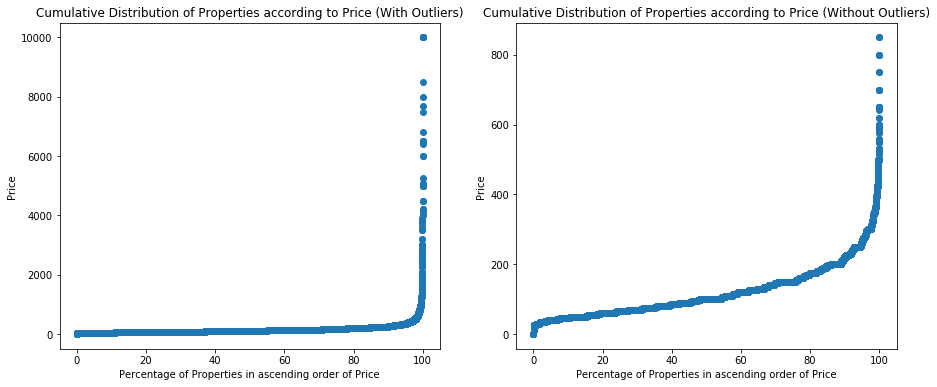

In [32]:
#Cumulative Distribution of Properties according to Price

#Set the size of the plot
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1) # row 1, col 2 index 1

#Get the data and format it
x = df_nyc[['price']].sort_values(by='price').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100* x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])



# Plot the data and configure the settings
plt.plot(x['PROPERTY PROPORTION'],x['price'], linestyle='None', marker='o')
plt.title('Cumulative Distribution of Properties according to Price (With Outliers)')
plt.xlabel('Percentage of Properties in ascending order of Price')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')


plt.subplot(1, 2, 2) # index 2

#Get the data and format it
x = df_nyc_clean[['price']].sort_values(by='price').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100* x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])



# Plot the data and configure the settings
plt.plot(x['PROPERTY PROPORTION'],x['price'], linestyle='None', marker='o')
plt.title('Cumulative Distribution of Properties according to Price (Without Outliers)')
plt.xlabel('Percentage of Properties in ascending order of Price')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


Note: The values on y-axis have changed

# Exploratory Data Analysis

Exploring catagorical variable

## Host analysis

In [33]:
#Pick top 20 host
top_host = df_nyc_clean.host_id.value_counts().head(20)
top_host

219517861    245
107434423    166
137358866     97
12243051      96
22541573      77
61391963      76
16098958      72
30283594      63
7503643       52
120762452     50
200380610     47
2856748       43
1475015       42
26377263      39
19303369      37
25237492      34
76104209      33
119669058     33
238321374     32
113805886     31
Name: host_id, dtype: int64

In [34]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [35]:
#Creating dataframe of top 20 neighbourhood by count

top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,245
1,107434423,166
2,137358866,97
3,12243051,96
4,22541573,77
5,61391963,76
6,16098958,72
7,30283594,63
8,7503643,52
9,120762452,50


[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '22541573'),
 Text(0, 0, '61391963'),
 Text(0, 0, '16098958'),
 Text(0, 0, '30283594'),
 Text(0, 0, '7503643'),
 Text(0, 0, '120762452'),
 Text(0, 0, '200380610'),
 Text(0, 0, '2856748'),
 Text(0, 0, '1475015'),
 Text(0, 0, '26377263'),
 Text(0, 0, '19303369'),
 Text(0, 0, '25237492'),
 Text(0, 0, '76104209'),
 Text(0, 0, '119669058'),
 Text(0, 0, '238321374'),
 Text(0, 0, '113805886')]

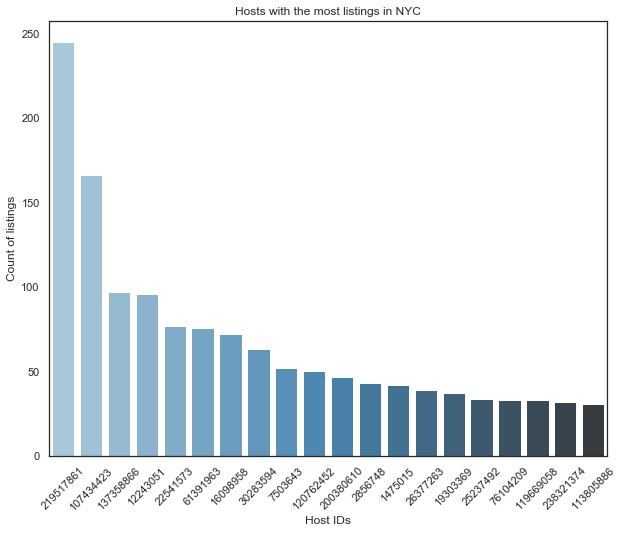

In [36]:
#ploting bar plot of top 20 neighburhood

viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d',order=top_host_df.sort_values('P_Count',ascending = False).Host_ID)
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

## Borough Analysis

Borough count

In [37]:
#count of listing in each borough
df_nyc['borough'].value_counts()

Brooklyn         19217
Manhattan        16885
Queens            5216
Bronx              687
Staten Island      341
Name: borough, dtype: int64

In [38]:
#proportion of count of listing in each borough
df_nyc['borough'].value_counts(normalize = True)*100

Brooklyn         45.380910
Manhattan        39.873896
Queens           12.317574
Bronx             1.622349
Staten Island     0.805271
Name: borough, dtype: float64

### Borough vs Price

In [39]:
#creating pivot table with borough and price aggregate with mean

borough_price = pd.pivot_table(df_nyc_clean, values = 'price', index = 'borough', 
                                        aggfunc = 'mean')
borough_price.sort_values('price', ascending = False )

,price
borough,
Manhattan,154.016032
Brooklyn,102.407469
Staten Island,84.242902
Queens,80.377063
Bronx,68.792722


Text(0, 0.5, 'Price')

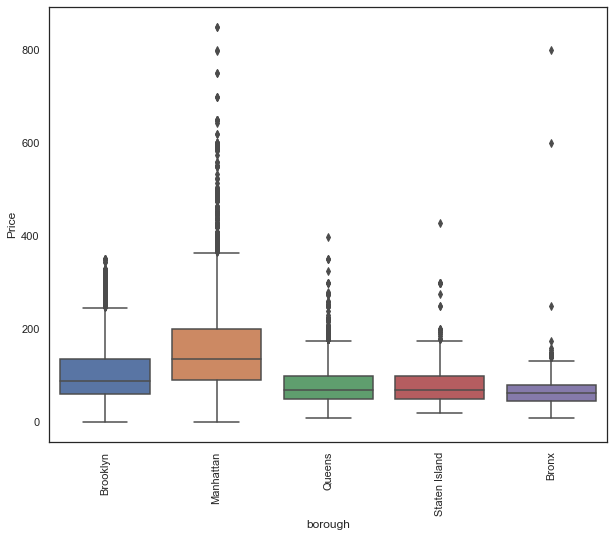

In [40]:
#Box plot of price in each borough

df_borough_price = df_nyc_clean[['price','borough']]
sns.boxplot(y='price', x='borough',data=df_borough_price)
plt.xticks(rotation=90)
plt.ylabel('Price')

Borough and price comparision

In [41]:
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=df_nyc_clean.loc[df_nyc_clean['borough'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df_nyc_clean.loc[df_nyc_clean['borough'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df_nyc_clean.loc[df_nyc_clean['borough'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df_nyc_clean.loc[df_nyc_clean['borough'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df_nyc_clean.loc[df_nyc_clean['borough'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [42]:
#empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#change names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilize dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,20.0,10.0
25%,60.0,90.0,50.0,50.0,45.0
50%,89.0,135.0,70.0,70.0,62.0
75%,135.0,200.0,100.0,100.0,80.0
max,350.0,850.0,398.0,429.0,800.0


## Neighbour Analysis

Top 20 neighbourhoods for rentals


In [43]:
#count of listing in each neighbourhood

df_nyc_clean.neighbourhood.value_counts().head(20)

williamsburg          3695
bedford-stuyvesant    3513
harlem                2465
bushwick              2275
upper west side       1826
east village          1726
upper east side       1658
crown heights         1445
midtown               1406
greenpoint            1054
chelsea               1032
lower east side        864
astoria                844
washington heights     836
financial district     679
flatbush               579
clinton hill           527
long island city       499
park slope             473
east flatbush          458
Name: neighbourhood, dtype: int64

Number of neghbourhoods in each borough

In [44]:
#count of neighbour in each borough

df_nyc_clean.groupby(['borough'])['neighbourhood'].nunique().sort_values(ascending= False)

borough
Queens           45
Brooklyn         41
Staten Island    35
Bronx            27
Manhattan        22
Name: neighbourhood, dtype: int64

In [45]:
#proportion of count of neighbour in each borough

borugh_neighbour_count = df_nyc_clean.groupby(['borough'])['neighbourhood'].nunique().sort_values(ascending= False)
borugh_neighbour_count/borugh_neighbour_count.sum()*100

borough
Queens           26.470588
Brooklyn         24.117647
Staten Island    20.588235
Bronx            15.882353
Manhattan        12.941176
Name: neighbourhood, dtype: float64

### Neighbourhood vs Price

In [46]:
neighbourhood_price = pd.pivot_table(df_nyc_clean, values = 'price', index = 'neighbourhood', 
                                        aggfunc = ['mean','median'])

neighbourhood_price.columns

MultiIndex([(  'mean', 'price'),
            ('median', 'price')],
           )

In [47]:
neighbourhood_price

,mean,median
,price,price
neighbourhood,,
arden heights,76.000000,75.0
arrochar,89.500000,65.0
arverne,136.138889,110.0
astoria,89.088863,80.0
bath beach,70.666667,59.0
...,...,...
willowbrook,249.000000,249.0
windsor terrace,121.082759,120.0


In [48]:
neighbourhood_price.reset_index(inplace = True)

In [49]:
neighbourhood_price


,neighbourhood,mean,median
,,price,price
0,arden heights,76.000000,75.0
1,arrochar,89.500000,65.0
2,arverne,136.138889,110.0
3,astoria,89.088863,80.0
4,bath beach,70.666667,59.0
...,...,...,...
165,willowbrook,249.000000,249.0
166,windsor terrace,121.082759,120.0
167,woodhaven,55.531646,50.0


In [50]:
neighbour_price = neighbourhood_price.T.reset_index(drop=True).T

In [51]:
neighbour_price.columns

RangeIndex(start=0, stop=3, step=1)

In [52]:
neighbour_price.rename(columns={0: 'neighbourhood', 1 : 'mean_price', 2:'median_price'}, inplace=True)

In [53]:
neighbour_price

,neighbourhood,mean_price,median_price
0,arden heights,76,75
1,arrochar,89.5,65
2,arverne,136.139,110
3,astoria,89.0889,80
4,bath beach,70.6667,59
...,...,...,...
165,willowbrook,249,249
166,windsor terrace,121.083,120
167,woodhaven,55.5316,50
168,woodlawn,60.0909,68


## Room Type analysis

How many residences are there by room type?

In [54]:
#count of listing for each room type

df_nyc_clean['room_type'].value_counts()

Private room       19442
Entire home/apt    19245
Shared room          931
Name: room_type, dtype: int64

In [55]:
#propportion of count of listing for each room type

df_nyc_clean.room_type.value_counts(normalize = True)*100

Private room       49.073653
Entire home/apt    48.576405
Shared room         2.349942
Name: room_type, dtype: float64

### roomtype vs price 

In [56]:
#creating pivot table with room type and price aggregate with mean

roomtype_price = pd.pivot_table(df_nyc_clean, values = 'price', index = 'room_type', 
                                        aggfunc = 'mean')
roomtype_price.sort_values('price', ascending = False )

,price
room_type,
Entire home/apt,164.227228
Private room,78.199517
Shared room,57.679914


Create two pivot tables to show
 1. the number of each room type by borough 
 2. the median price for each room type by borough.

In [57]:
pd.pivot_table(df_nyc_clean, values = 'price', index = 'borough', 
                                        columns = 'room_type',aggfunc = len)


room_type,Entire home/apt,Private room,Shared room
borough,,,
Bronx,188.0,415.0,29.0
Brooklyn,8081.0,9630.0,391.0
Manhattan,9258.0,6145.0,316.0
Queens,1583.0,3078.0,187.0
Staten Island,135.0,174.0,8.0


Brooklyn and Manhattan have approximately the same number of private rooms, but there is a significant difference in the entire home/apartment housing type. We need to investigate how to increase the number of entire home/apartment properties in Brooklyn.

**Count of each room type in each borough** 

## Latitude and logitude Analysis


No handles with labels found to put in legend.


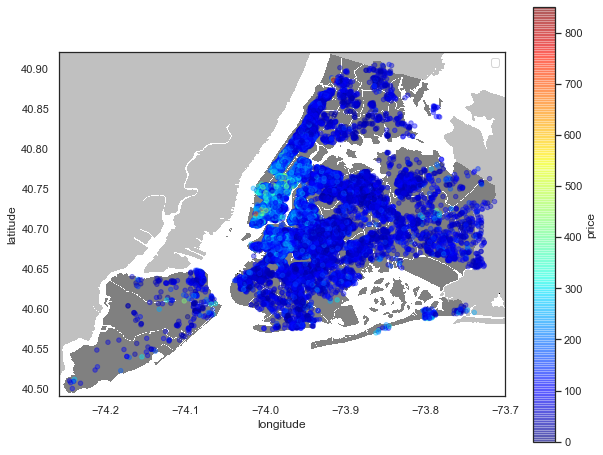

In [58]:
#plot listing on map

import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
df_nyc_clean.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

### Airport distance analysis


NYC has 3 major commercial airport
1. John F. Kennedy International Airport (JFK) (40.6413, -73.780968)
2. Newark Liberty International Airport (EWR) (40.735657, -74.172363)
3. LaGuardia Airport (LGA) (40.7747222222, -73.8719444444)


In [60]:
#Calculate distance of properties from these 3 airports
airport_locations = [[40.6413, -73.780968], [40.735657, -74.172363], [40.7747222222, -73.8719444444]]

#location of listings
listings_location = df_nyc_clean[['latitude','longitude']]

#Distance vector column= airports rows = listings and value = distance in KM 
airport_distance_vector = haversine_vector(airport_locations , listings_location , Unit.KILOMETERS, comb=True)

In [61]:
df_nyc_clean['JFK'] = airport_distance_vector[:,0]

In [62]:
df_nyc_clean['EWR'] = airport_distance_vector[:,1]

In [63]:
df_nyc_clean['LGA'] = airport_distance_vector[:,2]

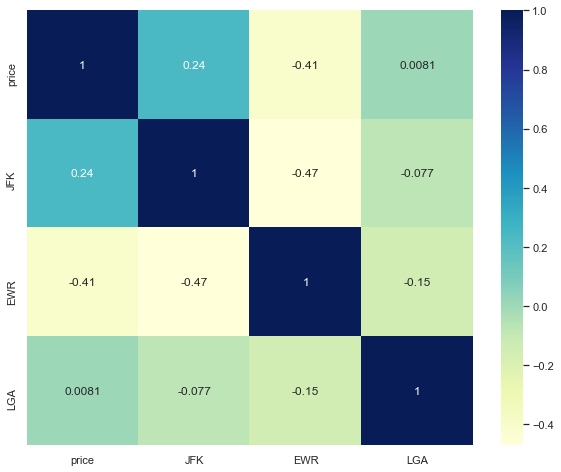

In [64]:
dataplot = sns.heatmap(df_nyc_clean[['name','price','JFK','EWR','LGA']].corr(), cmap="YlGnBu", annot=True)

EWR and price have a correlation of -0.32, which supports that prices of properties near EWR airport tend to be expensive.`


Bronx, Queens and Staten island do not have commercial neighbour therfore we didn't get those in above table

## Availability analysis

In [65]:
#value count of availability 365
df_nyc_clean['availability_365'].value_counts()

0.0      14859
365.0      918
364.0      370
1.0        352
5.0        280
         ...  
195.0       20
183.0       20
196.0       19
181.0       17
202.0       16
Name: availability_365, Length: 366, dtype: int64

In [66]:
df_nyc_clean['availability_365'].value_counts(normalize = True)*100

0.0      37.505679
365.0     2.317129
364.0     0.933919
1.0       0.888485
5.0       0.706749
           ...    
195.0     0.050482
183.0     0.050482
196.0     0.047958
181.0     0.042910
202.0     0.040386
Name: availability_365, Length: 366, dtype: float64

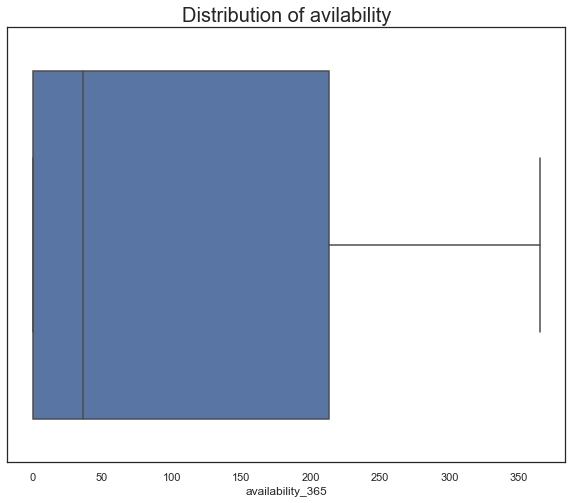

In [67]:
sns.boxplot(x=df_nyc_clean['availability_365']).set_title('Distribution of avilability', fontsize = 20)
sns.set(rc = {'figure.figsize':(15,8)})

### Availability borough wise

Just for Experiment

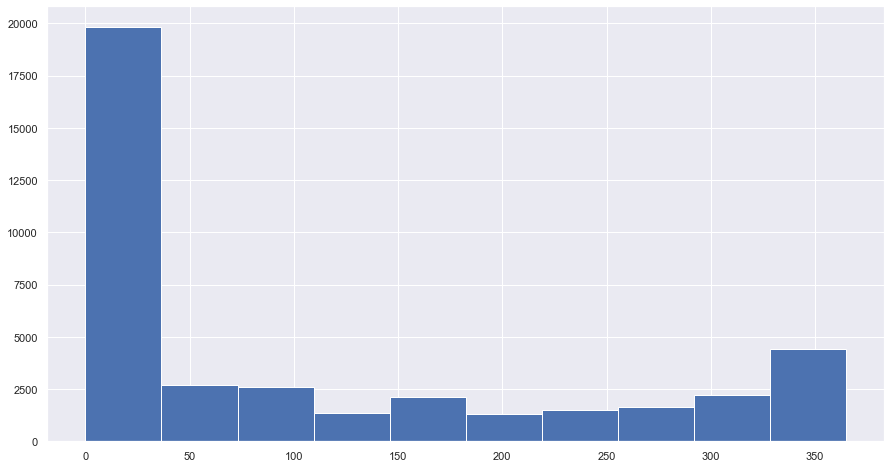

In [68]:
df_nyc_clean.availability_365.hist()

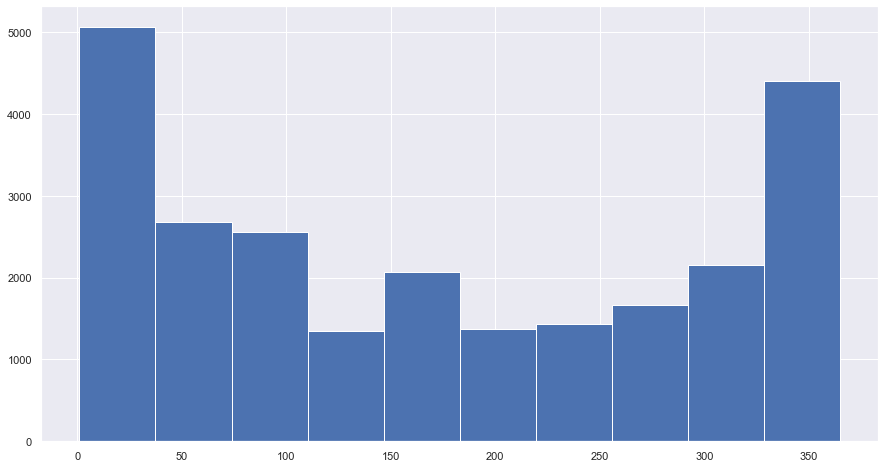

In [69]:
df_nyc_clean[df_nyc_clean['availability_365']>0].availability_365.hist()


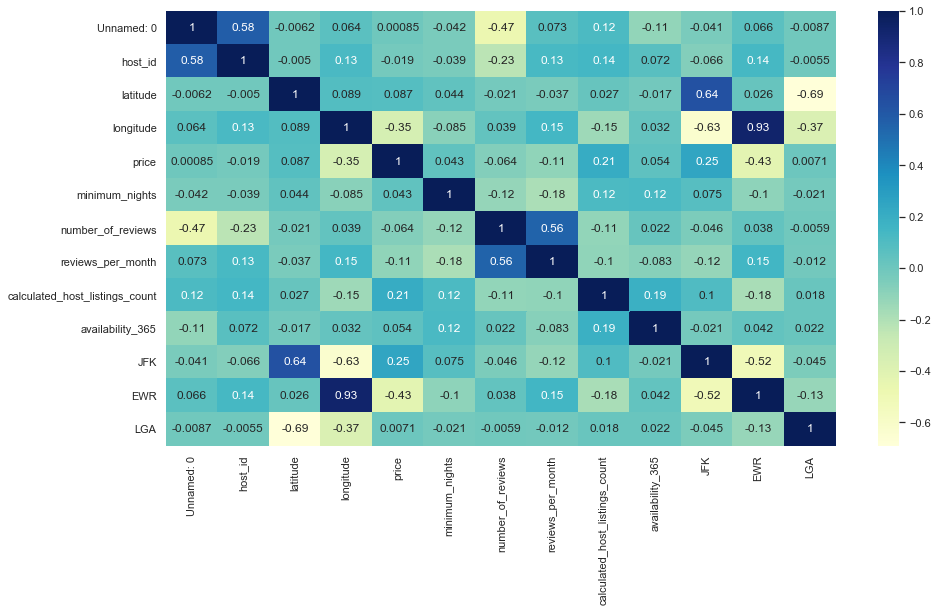

In [70]:
dataplot = sns.heatmap(df_nyc_clean[df_nyc_clean['availability_365']>0].corr(), cmap="YlGnBu", annot=True)

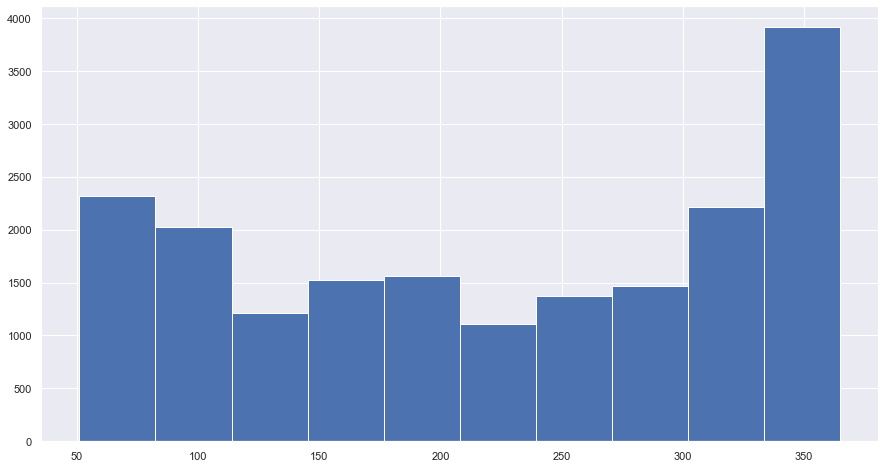

In [71]:
df_nyc_clean[df_nyc_clean['availability_365']>50]['availability_365'].hist()

## Minimum nights

In [72]:
df_nyc_clean['minimum_nights'].value_counts(normalize = True)*100

1.0      25.869554
2.0      24.132970
3.0      16.151749
30.0      7.708617
4.0       6.656065
           ...    
480.0     0.002524
275.0     0.002524
222.0     0.002524
88.0      0.002524
39.0      0.002524
Name: minimum_nights, Length: 102, dtype: float64

In [73]:
df_nyc['minimum_nights'].value_counts()

1.0      10857
2.0      10243
3.0       6961
30.0      3188
4.0       2869
         ...  
222.0        1
250.0        1
185.0        1
182.0        1
39.0         1
Name: minimum_nights, Length: 104, dtype: int64

# Insights

* The properties generally preferred by Airbnb hosts offering rental in NYC are entire homes and private rooms.
* The room types “entire home/apartment” and “private room” account for a major portion of listed properties in NYC (about 97%).
* Shared rooms account for 2.4% of the total listed properties.
* Rental properties in Manhattan and Brooklyn are more expensive than any other area, while those in the Bronx are the least expensive.
* Manhattan has a 51% contribution and Brooklyn has a 31% contribution in the entire home/apartment types of residence.
* Manhattan and Brooklyn have similar contributions (~40%) in private room types.
* Distance from Newark Liberty International Airport (EWR) and price have a negative correlation (-0.42), which shows that properties near EWR are more expensive. We did not find any significant correlation between the other two airports.

* The average revenue per day per property from each borough is higher for Manhattan.


### Exploring Data

In [75]:
# drop listings with 0 availability 

df_nyc_cleaner = df_nyc_clean[df_nyc_clean['availability_365']>0]

In [82]:
exp_df = pd.pivot_table(df_nyc_cleaner, values = ['price','availability_365'], index = 'neighbourhood', 
                                        aggfunc = ['mean','median'])


In [83]:
exp_df.reset_index(inplace = True)

In [84]:
exp_df = exp_df.T.reset_index(drop=True).T

In [85]:
exp_df

,0,1,2,3,4
0,arden heights,125.667,76,55,75
1,arrochar,251.85,89.5,301,65
2,arverne,189.338,137.603,158.5,110
3,astoria,177.259,89.2297,172,80
4,bath beach,214.286,68.9286,308.5,59
...,...,...,...,...,...
165,willowbrook,351,249,351,249
166,windsor terrace,142.096,117.205,126,105
167,woodhaven,229.903,56.5694,273,50
168,woodlawn,120.111,60.1111,70,68


In [86]:
exp_df.rename(columns={0: 'neighbourhood', 1 : 'mean_availability', 2:'mean_price',3 : 'median_availability', 4:'median_price'}, inplace=True)

In [87]:
exp_df

,neighbourhood,mean_availability,mean_price,median_availability,median_price
0,arden heights,125.667,76,55,75
1,arrochar,251.85,89.5,301,65
2,arverne,189.338,137.603,158.5,110
3,astoria,177.259,89.2297,172,80
4,bath beach,214.286,68.9286,308.5,59
...,...,...,...,...,...
165,willowbrook,351,249,351,249
166,windsor terrace,142.096,117.205,126,105
167,woodhaven,229.903,56.5694,273,50
168,woodlawn,120.111,60.1111,70,68


In [88]:
exp_df.to_csv("final_file.csv")